In [250]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [251]:
sal_data = pd.read_csv("salinity_data.csv")

In [252]:
x = sal_data["Time"].to_numpy()
x = x.reshape(-1, 1)
# print(x)

y = sal_data["Temperature"].to_numpy()
# print(y)

In [273]:
model_ln = LinearRegression()
model_dr = DecisionTreeRegressor()
model_fr = RandomForestRegressor()

In [274]:
model_ln.fit(x, y)
model_dr.fit(x, y)
model_fr.fit(x, y)

RandomForestRegressor()

In [275]:
start_value = 734122
gap = 30

# Create the array
x_pre = np.arange(start_value, start_value + 60 * gap, gap)
x_pre = x_pre.reshape(-1, 1)
# x_pre = np.concatenate((x, x_pre))
# print(x_pre)

In [276]:
y_pre_ln = model_ln.predict(x_pre)
y_pre_dr = model_dr.predict(x_pre)
y_pre_fr = model_fr.predict(x_pre)
# y_pre_log = model_fr.predict(x_pre)

In [277]:
# Define a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=50)  # Adjust the number of epochs as needed

# Make predictions
y_pre_neural = model.predict(x_pre)
# print(y_pre_neural)


Epoch 1/50
53/53 [==============================] - 1s 2ms/step - loss: 786184704.0000
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 2908755.0000
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 8715.2695
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 41.8131
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 0.7430
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6196
Epoch 7/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6174
Epoch 8/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6195
Epoch 9/50
53/53 [==============================] - 0s 1ms/step - loss: 0.6236
Epoch 10/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6478
Epoch 11/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6303
Epoch 12/50
53/53 [==============================] - 0s 2ms/step - loss: 0.6197
Epoch 13/50
53/53 [============

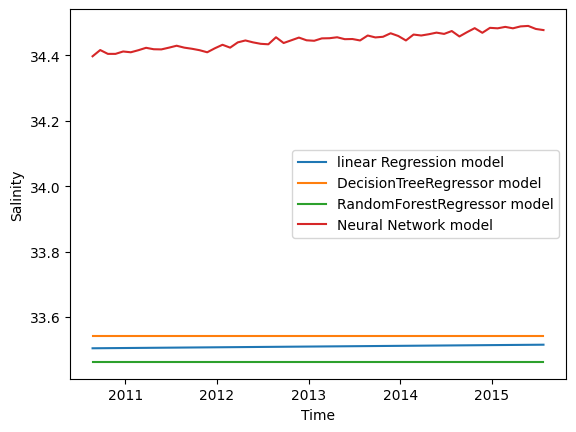

In [278]:
# Create the plot
plt.show()

plt.plot((x_pre-734250)/360+2011, y_pre_ln, label='linear Regression model')
plt.plot((x_pre-734250)/360+2011, y_pre_dr, label='DecisionTreeRegressor model')
plt.plot((x_pre-734250)/360+2011, y_pre_fr, label='RandomForestRegressor model')
plt.plot((x_pre-734250)/360+2011, y_pre_neural, label='Neural Network model')
# plt.axvline(x=734122, c='r', linestyle='--',label='upto 2015')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Salinity')
plt.legend()

# Display the plot